Import the python code files

In [1]:
%run -i loom.py
%run -i weave_grids.py
%run -i biaxial_weave_units.py
%run -i triaxial_weave_units.py
%run -i weaving_space_utils.py
%run -i render_weave_grids.py

import geopandas
from matplotlib import pyplot
from itertools import chain

from shapely.affinity import scale

%matplotlib inline

<AxesSubplot:>

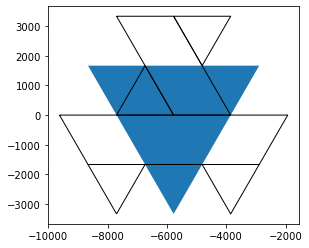

In [2]:
coords = (1, 2, 0)

g = _WeaveGrid(3, (0, 120, 240), 5000)
c = geopandas.GeoSeries([g.get_grid_cell_at(coords)])
ax = c.plot()

# cs = g._get_cell_strands(width = 1, n_slices = 3, coords = (1, 1, 1))
# cs = geopandas.GeoSeries(cs)
# cs.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "k")

vcs = g.get_visible_cell_strands(width = 1/3, coords = coords)
vcs = geopandas.GeoSeries(vcs)
vcs.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "k")


<AxesSubplot:>

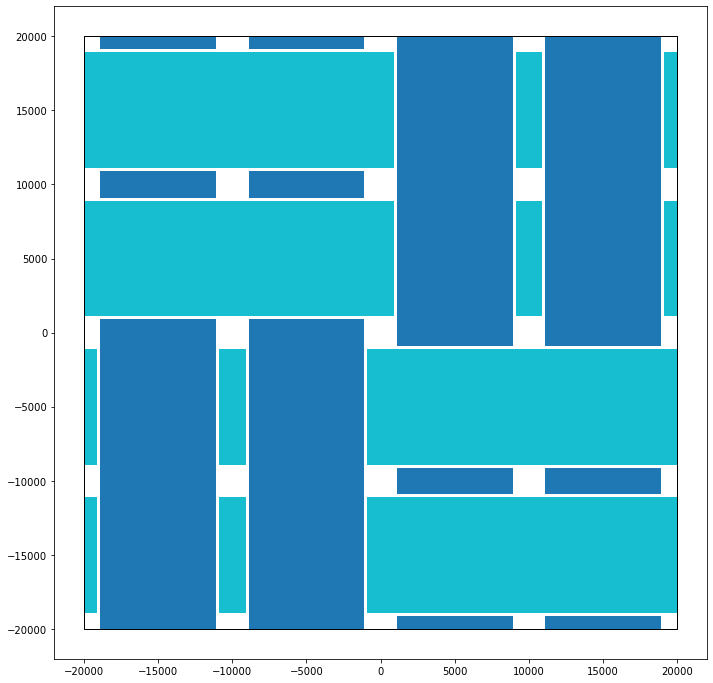

In [10]:
result = get_biaxial_weave_unit(weave_type = "basket", aspect = 0.8, margin = 100, strands = "a|b|c")
weave = result["weave_unit"]
tile = result["tile"]

fig = pyplot.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
weave.plot(ax = ax, column = "strand")
tile.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "k")

<AxesSubplot:>

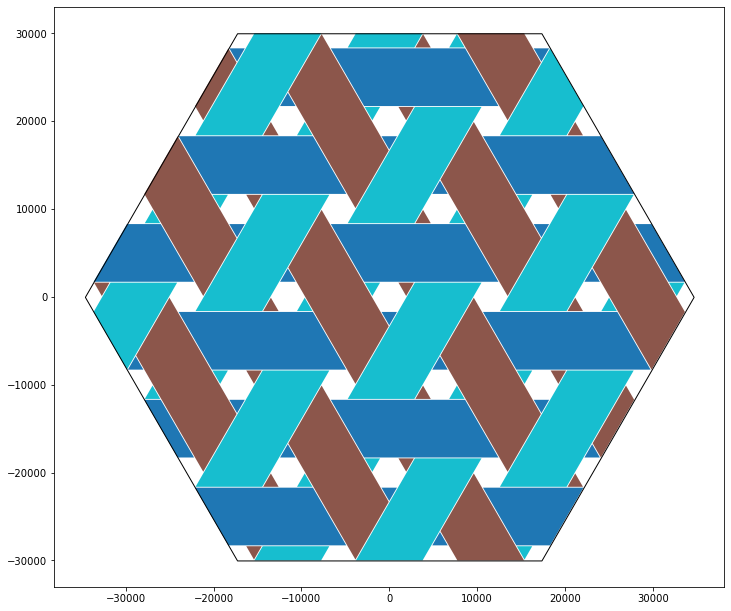

In [11]:
result = get_triaxial_weave_unit(weave_type = "cube", aspect = 2/3, margin = 50, strands = "a|b|c")
weave = result["weave_unit"]
tile = result["tile"]

fig = pyplot.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
weave.plot(ax = ax, column = "strand")
tile.plot(ax = ax, facecolor = "#ffffff00", edgecolor = "k")

In [5]:
weave

,strand,geometry
4,g,"MULTIPOLYGON (((7431.276 10471.428, 7678.624 1..."
3,f,"MULTIPOLYGON (((21782.635 -20671.426, 21939.34..."
0,a,"MULTIPOLYGON (((29560.320 8800.000, 33948.180 ..."
1,c,"MULTIPOLYGON (((24710.539 -1200.000, 29098.434..."
2,d,"MULTIPOLYGON (((21939.308 19600.013, 22343.196..."
5,i,"MULTIPOLYGON (((33717.289 800.000, 33486.343 3..."
